# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
weather_df = pd.DataFrame(cities)
weather_df.rename(columns={0:"City"}, inplace=True)
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Tmp"] = ""
weather_df["Wind Speed"] = ""


In [74]:
print("Beginning Data Retrieval")
print("------------------------------")
for indx, row in weather_df.iterrows():
#     if indx ==5:
#             break
    print("Processing Record {0} of {1} | {2}".format(indx+1,len(cities), row["City"]))
    url="http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}".format(row["City"],api_key2)
    response = requests.get(url).json()

    if "message" in response :
        print("City {0} Not found,Skipping.. ".format(row["City"]))
    else:
        row["Cloudiness"]= response["clouds"]["all"]
        row["Country"] = response["sys"]["country"]
        row["Date"] = response["dt"]
        row["Humidity"] = response["main"]["humidity"]
        row["Lat"] = response["coord"]["lat"]
        row["Lng"] = response["coord"]["lon"]
        row["Max Tmp"] = response["main"]["temp_max"]
        row["Wind Speed"] = response["wind"]["speed"]
        
#     except(KeyError, IndexError):
#         print(KeyError, IndexError)
#print(json.dumps(response, indent=4))


Beginning Data Retrieval
------------------------------
Processing Record 1 of 605 | pevek
Processing Record 2 of 605 | punta arenas
Processing Record 3 of 605 | paamiut
Processing Record 4 of 605 | new norfolk
Processing Record 5 of 605 | airai
Processing Record 6 of 605 | yellowknife
Processing Record 7 of 605 | atuona
Processing Record 8 of 605 | lebu
Processing Record 9 of 605 | kuroiso
Processing Record 10 of 605 | norman wells
Processing Record 11 of 605 | ponta do sol
Processing Record 12 of 605 | teya
Processing Record 13 of 605 | port alfred
Processing Record 14 of 605 | longyearbyen
Processing Record 15 of 605 | mataura
Processing Record 16 of 605 | port moresby
Processing Record 17 of 605 | grindavik
Processing Record 18 of 605 | tasiilaq
Processing Record 19 of 605 | bambanglipuro
Processing Record 20 of 605 | busselton
Processing Record 21 of 605 | khao wong
Processing Record 22 of 605 | ushuaia
Processing Record 23 of 605 | maniitsoq
Processing Record 24 of 605 | kieta
Pr

Processing Record 190 of 605 | geraldton
Processing Record 191 of 605 | broken hill
Processing Record 192 of 605 | narsaq
Processing Record 193 of 605 | ilulissat
Processing Record 194 of 605 | aykhal
Processing Record 195 of 605 | guerrero negro
Processing Record 196 of 605 | saint-augustin
Processing Record 197 of 605 | muisne
Processing Record 198 of 605 | arlit
Processing Record 199 of 605 | lohja
Processing Record 200 of 605 | kruisfontein
Processing Record 201 of 605 | sidmouth
Processing Record 202 of 605 | kodiak
Processing Record 203 of 605 | toamasina
Processing Record 204 of 605 | paranaiba
Processing Record 205 of 605 | sitka
Processing Record 206 of 605 | sentyabrskiy
City sentyabrskiy Not found,Skipping.. 
Processing Record 207 of 605 | santa clara
Processing Record 208 of 605 | hasaki
Processing Record 209 of 605 | manoel urbano
Processing Record 210 of 605 | buraydah
Processing Record 211 of 605 | paraiso
Processing Record 212 of 605 | camacha
Processing Record 213 of 6

City umzimvubu Not found,Skipping.. 
Processing Record 377 of 605 | vestmannaeyjar
Processing Record 378 of 605 | xichang
Processing Record 379 of 605 | thinadhoo
Processing Record 380 of 605 | phalombe
Processing Record 381 of 605 | la ronge
Processing Record 382 of 605 | takaka
Processing Record 383 of 605 | san onofre
Processing Record 384 of 605 | renqiu
Processing Record 385 of 605 | nouadhibou
Processing Record 386 of 605 | paharpur
Processing Record 387 of 605 | loikaw
Processing Record 388 of 605 | mersing
Processing Record 389 of 605 | pacific grove
Processing Record 390 of 605 | kamenka
Processing Record 391 of 605 | okha
Processing Record 392 of 605 | katobu
Processing Record 393 of 605 | pires do rio
Processing Record 394 of 605 | lakatoro
Processing Record 395 of 605 | palabuhanratu
City palabuhanratu Not found,Skipping.. 
Processing Record 396 of 605 | launceston
Processing Record 397 of 605 | vilhena
Processing Record 398 of 605 | moura
Processing Record 399 of 605 | fid

Processing Record 567 of 605 | malwan
City malwan Not found,Skipping.. 
Processing Record 568 of 605 | faya
Processing Record 569 of 605 | chudniv
Processing Record 570 of 605 | rosario
Processing Record 571 of 605 | aksu
Processing Record 572 of 605 | nieves
Processing Record 573 of 605 | bardiyah
City bardiyah Not found,Skipping.. 
Processing Record 574 of 605 | luanda
Processing Record 575 of 605 | maraa
Processing Record 576 of 605 | tolaga bay
Processing Record 577 of 605 | topchikha
Processing Record 578 of 605 | rivadavia
Processing Record 579 of 605 | chamalieres
Processing Record 580 of 605 | talcahuano
Processing Record 581 of 605 | acari
Processing Record 582 of 605 | hailey
Processing Record 583 of 605 | mayumba
Processing Record 584 of 605 | evensk
Processing Record 585 of 605 | ko samui
Processing Record 586 of 605 | ambodifototra
City ambodifototra Not found,Skipping.. 
Processing Record 587 of 605 | sambava
Processing Record 588 of 605 | mercedes
Processing Record 589 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Tmp,Wind Speed
0,pevek,8,RU,1554017343,72,69.7,170.27,257.574,1.5
1,punta arenas,40,CL,1554016946,71,-53.16,-70.91,284.15,10.8
2,paamiut,68,GL,1554017344,100,61.99,-49.67,269.674,3.4
3,new norfolk,40,AU,1554017295,64,-42.78,147.06,286.15,6.7
4,airai,44,TL,1554017344,65,-8.93,125.41,300.024,0.82


In [76]:
weather_df.to_csv(r"weather_data_by_city.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

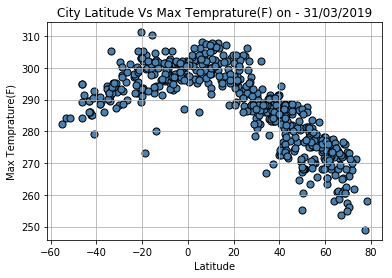

In [77]:
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Max Tmp"] = pd.to_numeric(weather_df["Max Tmp"])
weather_df.plot.scatter("Lat", "Max Tmp", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")
plt.title("City Latitude Vs Max Temprature(F) on - " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)


#### Latitude vs. Humidity Plot

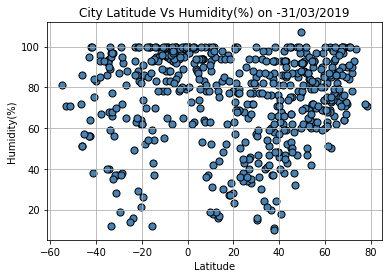

In [78]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df.plot.scatter("Lat", "Humidity", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity(%) on -" + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)

#### Latitude vs. Cloudiness Plot

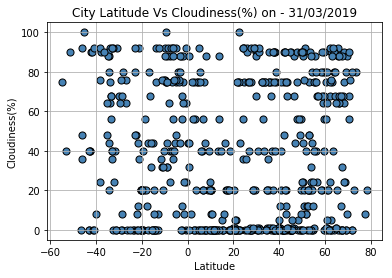

In [79]:
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df.plot.scatter("Lat", "Cloudiness", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness(%) on - " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)

#### Latitude vs. Wind Speed Plot

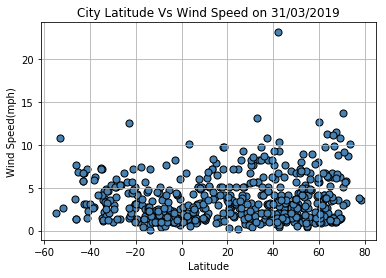

In [80]:
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])
weather_df.plot.scatter("Lat", "Wind Speed", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude Vs Wind Speed on " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)